# Visualizaion of IPC stats for Senegal

resource origin: https://data.humdata.org/dataset/cadre-harmonise

Value is IPC calculated according to IPC Technical manual 3.0

For a brief idea about that IPC phase means: https://www.humanitarianresponse.info/sites/www.humanitarianresponse.info/files/documents/files/IPC%20Reference%20Table.pdf

In [1]:
# imports
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib inline

### Data preparation

In [3]:
data_folder = Path.cwd().parent.parent.joinpath('data', 'external')
path_to_file = Path(data_folder).joinpath('cadre_harmonise.csv')

df = pd.read_csv(path_to_file)

In [4]:
df["adm0_name"].unique()

array(['Burkina Faso', 'Mali', 'Mauritania', 'Niger', 'Nigeria',
       'Senegal', 'Chad', 'Benin', "Cote d'Ivoire", 'Cameroon',
       'Cabo Verde', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Togo', 'Central African Republic'],
      dtype=object)

In [5]:
sen = df[df["adm0_name"] == 'Senegal'].copy()

In [6]:
sen["exercise_year"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [7]:
sen.head()

,adm0_name,adm0_gaulcode,adm0_pcod3,adm0_pcod2,region,adm1_name,adm1_gaulcode,adm1_pcod3,adm1_pcod2,adm2_name,...,exercise_label,exercise_year,reference_code,reference_label,reference_year,status,notes,Comments,DataSource,UseThisPeriod
8927,Senegal,217,SEN,SN,NaN,Kolda,1375.0,SEN007,SN07,Velingara,...,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN,NaN
8928,Senegal,217,SEN,SN,NaN,Kolda,1375.0,SEN007,SN07,Kolda,...,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN,NaN
8929,Senegal,217,SEN,SN,NaN,Kolda,1375.0,SEN007,SN07,Medina Yoro Foulah,...,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN,NaN
8930,Senegal,217,SEN,SN,NaN,Louga,47587.0,SEN008,SN08,Louga,...,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN,NaN
8931,Senegal,217,SEN,SN,NaN,Louga,47587.0,SEN008,SN08,Linguere,...,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN,NaN


In [8]:
sen.columns

Index(['adm0_name', 'adm0_gaulcode', 'adm0_pcod3', 'adm0_pcod2', 'region',
       'adm1_name', 'adm1_gaulcode', 'adm1_pcod3', 'adm1_pcod2', 'adm2_name',
       'adm2_gaulcode', 'adm2_pcod3', 'adm2_pcod2', 'population',
       'phase_class', 'phase1', 'phase2', 'phase3', 'phase4', 'phase5',
       'phase35', 'chtype', 'exercise_code', 'exercise_label', 'exercise_year',
       'reference_code', 'reference_label', 'reference_year', 'status',
       'notes', 'Comments', 'DataSource', 'UseThisPeriod'],
      dtype='object')

In [9]:
sen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 8927 to 10108
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   adm0_name        1182 non-null   object 
 1   adm0_gaulcode    1182 non-null   int64  
 2   adm0_pcod3       1182 non-null   object 
 3   adm0_pcod2       1182 non-null   object 
 4   region           0 non-null      object 
 5   adm1_name        1182 non-null   object 
 6   adm1_gaulcode    1182 non-null   float64
 7   adm1_pcod3       1182 non-null   object 
 8   adm1_pcod2       1182 non-null   object 
 9   adm2_name        1182 non-null   object 
 10  adm2_gaulcode    1182 non-null   float64
 11  adm2_pcod3       1182 non-null   object 
 12  adm2_pcod2       1182 non-null   object 
 13  population       1182 non-null   float64
 14  phase_class      1182 non-null   float64
 15  phase1           1182 non-null   float64
 16  phase2           1182 non-null   float64
 17  phase3    

In [10]:
sen.drop(labels=['adm0_name', 'adm0_gaulcode', 'adm0_pcod3', 'adm0_pcod2', 'region',
       'adm2_gaulcode', 'adm2_pcod3', 'adm2_pcod2', 
       'notes'], axis=1, inplace=True)

In [11]:
sen.reset_index(inplace=True, drop=True)

In [12]:
kolda_df = sen[sen["adm2_name"] == 'Kolda'].copy()

In [13]:
kolda_df.columns

Index(['adm1_name', 'adm1_gaulcode', 'adm1_pcod3', 'adm1_pcod2', 'adm2_name',
       'population', 'phase_class', 'phase1', 'phase2', 'phase3', 'phase4',
       'phase5', 'phase35', 'chtype', 'exercise_code', 'exercise_label',
       'exercise_year', 'reference_code', 'reference_label', 'reference_year',
       'status', 'Comments', 'DataSource', 'UseThisPeriod'],
      dtype='object')

In [14]:
kolda_df.drop(labels=['adm1_gaulcode', 'adm1_pcod3', 'adm1_pcod2', 'adm2_name',
       'population', 'phase_class', 'phase1', 'phase2', 'phase3', 'phase4',
       'phase5', 'phase35', 
       'status'], axis=1).set_index(["exercise_year", 'exercise_label']).sort_index()

adm1_name     chtype  exercise_code  \
exercise_year exercise_label                                       
2014          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   
2015          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   
2016          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   
2017          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   
2018          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   
2019          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   
2020          Jan-May            Kolda    current              2   
              Jan-May            Kolda  projected              2   
              Sep-Dec            Kolda    current              1   
              Sep-Dec            Kolda  projected              1   

                              reference_code reference_label  reference_year  \
exercise_year exercise_label                                                   
2014          Jan-May                      2         Jan-May            2014   
              Jan-May                      3         Jun-Aug            2014   
              Sep-Dec                      1         Sep-Dec            2014   
              Sep-Dec                      2         Jan-May            2015   
2015          Jan-May                      2         Jan-May            2015   
              Jan-May                      3         Jun-Aug            2015   
              Sep-Dec                      1         Sep-Dec            2015   
              Sep-Dec                      3         Jun-Aug            2016   
2016          Jan-May                      2         Jan-May            2016   
              Jan-May                      3         Jun-Aug            2016   
              Sep-Dec                      1         Sep-Dec            2016   
              Sep-Dec                      3         Jun-Aug            2017   
2017          Jan-May                      2         Jan-May            2017   
              Jan-May                      3         Jun-Aug            2017   
              Sep-Dec                      1         Sep-Dec            2017   
              Sep-Dec                      3         Jun-Aug            2018   
2018          Jan-May                      2         Jan-May            2018   
              Jan-May                      3         Jun-Aug            2018   
              Sep-Dec                      1         Sep-Dec            2018   
              Sep-Dec                      3         Jun-Aug            2019   
2019          Jan-May                      2         Jan-May            2019   
              Jan-May                      3         Jun-Aug            2019   
              Sep-Dec                      1         Sep-Dec        

As we can see above, we there are 3 time periods within the year.

Jan - May:
        
    current Jan - May 
    predict Jun - Aug

No analysis on Jun - Aug

Sep - Dec:
        
    current Sep - Dec
    predict Jan - May (only for year 2015)

In [15]:
ipc_current = sen[sen["chtype"] == 'current'].copy()

In [16]:
ipc_current["status"].unique()

array(['outofcamp'], dtype=object)

In [17]:
ipc_current.drop("status", axis = 1, inplace=True)

In [18]:
ipc_current.where(ipc_current["exercise_label"] != ipc_current["reference_label"]).dropna()

,adm1_name,adm1_gaulcode,adm1_pcod3,adm1_pcod2,adm2_name,population,phase_class,phase1,phase2,phase3,...,chtype,exercise_code,exercise_label,exercise_year,reference_code,reference_label,reference_year,Comments,DataSource,UseThisPeriod


In [19]:
ipc_current

,adm1_name,adm1_gaulcode,adm1_pcod3,adm1_pcod2,adm2_name,population,phase_class,phase1,phase2,phase3,...,chtype,exercise_code,exercise_label,exercise_year,reference_code,reference_label,reference_year,Comments,DataSource,UseThisPeriod
0,Kolda,1375.0,SEN007,SN07,Velingara,289381.0,2.0,208354.0,57876.0,23150.0,...,current,2,Jan-May,2014,2,Jan-May,2014,NaN,NaN,NaN
1,Kolda,1375.0,SEN007,SN07,Kolda,249271.0,2.0,184461.0,47361.0,17449.0,...,current,2,Jan-May,2014,2,Jan-May,2014,NaN,NaN,NaN
2,Kolda,1375.0,SEN007,SN07,Medina Yoro Foulah,134688.0,2.0,106404.0,21550.0,6734.0,...,current,2,Jan-May,2014,2,Jan-May,2014,NaN,NaN,NaN
3,Louga,47587.0,SEN008,SN08,Louga,387594.0,3.0,135658.0,174417.0,62015.0,...,current,2,Jan-May,2014,2,Jan-May,2014,NaN,NaN,NaN
4,Louga,47587.0,SEN008,SN08,Linguere,258325.0,2.0,206660.0,36166.0,15500.0,...,current,2,Jan-May,2014,2,Jan-May,2014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,Thies,2644.0,SEN013,SN13,Thies,829174.0,1.0,704798.0,124376.0,0.0,...,current,1,Sep-Dec,2020,1,Sep-Dec,2020,NaN,NaN,NaN
1133,Thies,2644.0,SEN013,SN13,Tivaouane,561428.0,1.0,505285.0,56143.0,0.0,...,current,1,Sep-Dec,2020,1,Sep-Dec,2020,NaN,NaN,NaN
1134,Ziguinchor,2645.0,SEN014,SN14,Bignona,324943.0,2.0,214462.0,90984.0,19497.0,...,current,1,Sep-Dec,2020,1,Sep-Dec,2020,NaN,NaN,NaN
1135,Ziguinchor,2645.0,SEN014,SN14,Oussouye,62185.0,1.0,52235.0,8084.0,1866.0,...,current,1,Sep-Dec,2020,1,Sep-Dec,2020,NaN,NaN,NaN


In [20]:
# df2 = pd.read_csv('ipc_current.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ipc_current.csv'

In [21]:
ipc_current.drop(labels=['exercise_code', 'exercise_label', 'exercise_year', 'adm1_gaulcode', 
                        'adm1_pcod3', 'adm1_pcod2','chtype'],axis=1, inplace=True)

In [22]:
ipc_current["reference_label"].unique()

array(['Jan-May', 'Sep-Dec'], dtype=object)

In [23]:
month = ipc_current['reference_label'].apply(lambda x: "01-01" if x == "Jan-May" else "09-01").to_numpy()
year =  ipc_current['reference_year'].apply(lambda x: str(x)).to_numpy()

dt = np.empty_like(month)

for i in range(len(month)):
    dt[i] = year[i] + '-' + month[i]

In [24]:
ipc_current.loc[:,'datetime'] = dt

In [25]:
ipc_current.drop(labels=['reference_label', 'reference_year', 'reference_code'],axis=1, inplace=True)

In [26]:
ipc_current.set_index(keys=["adm1_name", "adm2_name", 'datetime'], drop=True, inplace=True)

### Now we have IPC stats prepared in a DataFrame

Index
- adm1_name: Gaul1 region
- adm2_name: Gaul2 region 
- datetime: date of measurement (note that since it is a value measured for two timeframes within the year
    -  Jan - May (denoted as YYYY-01-01)
    - Sep - Dec (denoted as YYYY-09-01)

In [27]:
ipc_current.head()

population  phase_class    phase1  \
adm1_name adm2_name          datetime                                        
Kolda     Velingara          2014-01-01    289381.0          2.0  208354.0   
          Kolda              2014-01-01    249271.0          2.0  184461.0   
          Medina Yoro Foulah 2014-01-01    134688.0          2.0  106404.0   
Louga     Louga              2014-01-01    387594.0          3.0  135658.0   
          Linguere           2014-01-01    258325.0          2.0  206660.0   

                                           phase2   phase3   phase4  phase5  \
adm1_name adm2_name          datetime                                         
Kolda     Velingara          2014-01-01   57876.0  23150.0      0.0     0.0   
          Kolda              2014-01-01   47361.0  17449.0      0.0     0.0   
          Medina Yoro Foulah 2014-01-01   21550.0   6734.0      0.0     0.0   
Louga     Louga              2014-01-01  174417.0  62015.0  15504.0     0.0   
          Linguere           2014-01-01   36166.0  15500.0      0.0     0.0   

                                         phase35  Comments DataSource  \
adm1_name adm2_name          datetime                                   
Kolda     Velingara          2014-01-01  23150.0       NaN        NaN   
          Kolda              2014-01-01  17449.0       NaN        NaN   
          Medina Yoro Foulah 2014-01-01   6734.0       NaN        NaN   
Louga     Louga              2014-01-01  77519.0       NaN        NaN   
          Linguere           2014-01-01  15500.0       NaN        NaN   

                                        UseThisPeriod  
adm1_name adm2_name          datetime                  
Kolda     Velingara          2014-01-01           NaN  
          Kolda              2014-01-01           NaN  
          Medina Yoro Foulah 2014-01-01           NaN  
Louga     Louga              2014-01-01           NaN  
          Linguere           2014-01-01           NaN

In [28]:
regions = sen["adm1_name"].unique()

### Plot IPC for Senegal

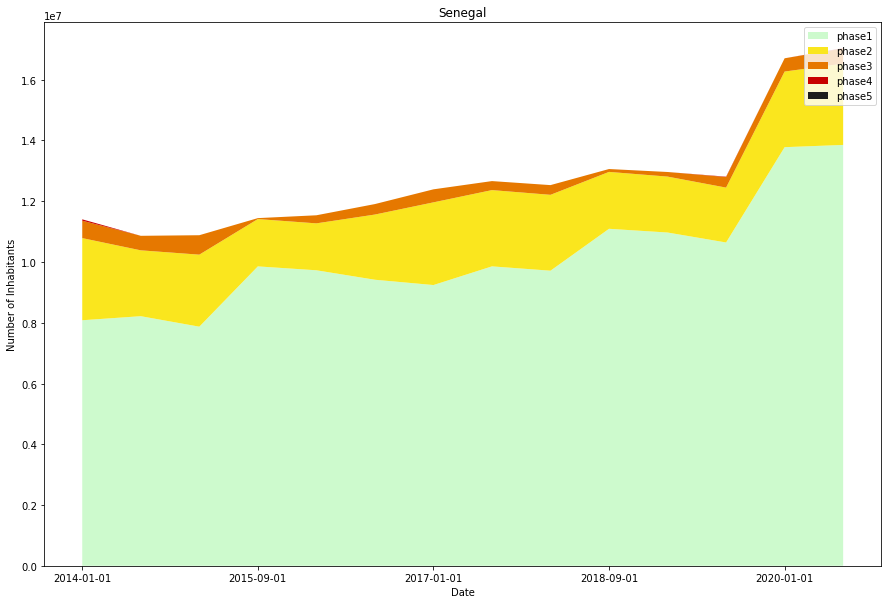

In [29]:
temp_df = ipc_current.groupby("datetime").sum().sort_index()
temp_df = temp_df[['phase1', 'phase2', 'phase3', 'phase4', 'phase5']]


fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.stackplot(temp_df.index, temp_df.values.T,
            colors = ["#CDFACD", "#FAE61E", "#E67800", "#C80000", "#1D1D1D"],
                       labels=temp_df.columns)
ax.legend()
ax.set_title("Senegal")
ax.set_xlabel("Date")
ax.set_ylabel("Number of Inhabitants")
ax.set_xticks(temp_df.index.to_numpy()[::3])

plt.show()

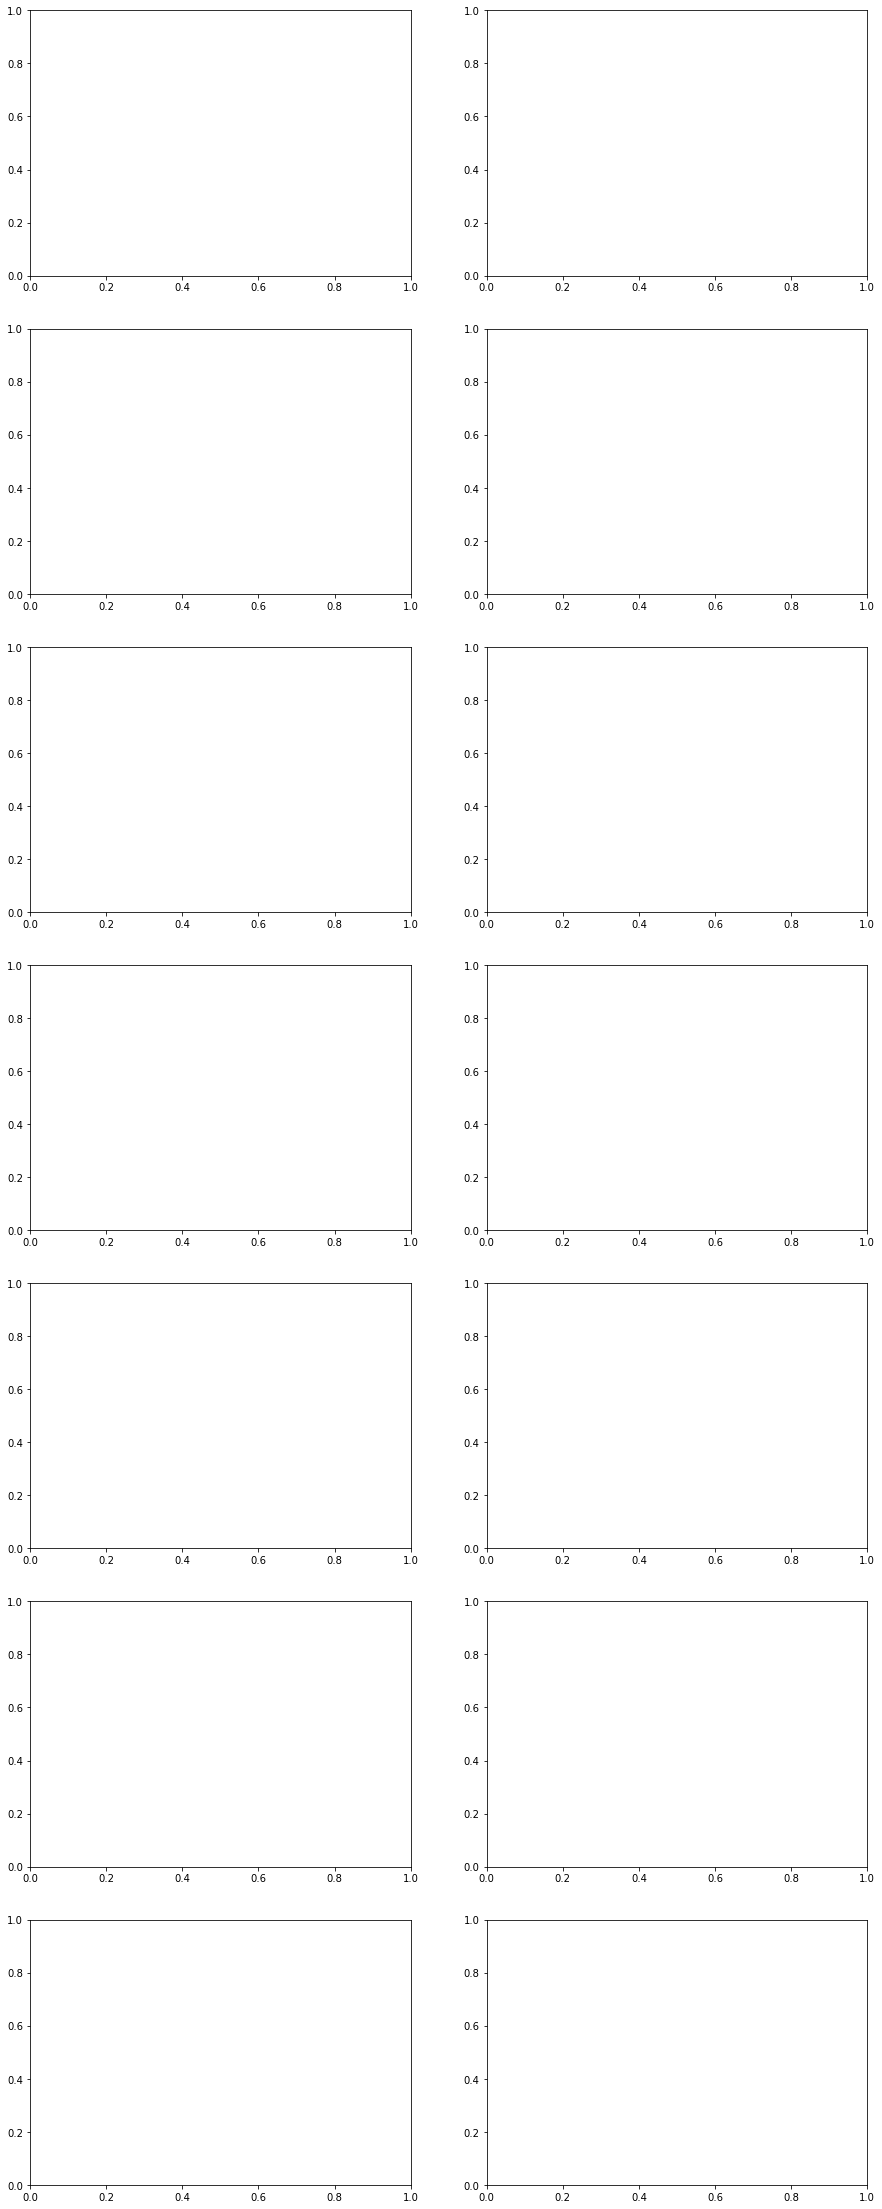

In [30]:
def plot_ipc_reg(ax, ipc_current, reg_name):
    
    temp_df = ipc_current.xs(reg_name, level=0).groupby("datetime").sum()
    temp_df.sort_index()
    temp_df = temp_df[['phase1', 'phase2', 'phase3', 'phase4', 'phase5']]
    ax.stackplot(temp_df.index,temp_df.values.T,
                        colors = ["#CDFACD", "#FAE61E", "#E67800", "#C80000", "#1D1D1D"],
                       labels=temp_df.columns)
    ax.legend()
    ax.set_title(reg_name)
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of Inhabitants")
    ax.set_xticks(temp_df.index.to_numpy()[::3])
    
fig, ax = plt.subplots(7,2, figsize=(15,40))
ax = ax.flatten()    

# for i in range(len(regions)):
#     plot_ipc_reg(ax[i], ipc_current, regions[i])

In [31]:
# ipc_current.to_csv('ipc_current')

In [32]:
# sen.to_csv('ipc_complete.csv')

### Compare predictions for Jan - May

In [33]:
sen.head()

,adm1_name,adm1_gaulcode,adm1_pcod3,adm1_pcod2,adm2_name,population,phase_class,phase1,phase2,phase3,...,exercise_code,exercise_label,exercise_year,reference_code,reference_label,reference_year,status,Comments,DataSource,UseThisPeriod
0,Kolda,1375.0,SEN007,SN07,Velingara,289381.0,2.0,208354.0,57876.0,23150.0,...,2,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN
1,Kolda,1375.0,SEN007,SN07,Kolda,249271.0,2.0,184461.0,47361.0,17449.0,...,2,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN
2,Kolda,1375.0,SEN007,SN07,Medina Yoro Foulah,134688.0,2.0,106404.0,21550.0,6734.0,...,2,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN
3,Louga,47587.0,SEN008,SN08,Louga,387594.0,3.0,135658.0,174417.0,62015.0,...,2,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN
4,Louga,47587.0,SEN008,SN08,Linguere,258325.0,2.0,206660.0,36166.0,15500.0,...,2,Jan-May,2014,2,Jan-May,2014,outofcamp,NaN,NaN,NaN


In [34]:
def get_frame(sen, keyword):
    df = sen[sen['chtype'] == keyword].copy()

    if keyword == 'projected':
        label = 'reference_label'
        year = 'reference_year'
    else:
        label = 'exercise_label'
        year = 'exercise_year'
    df = df[['adm1_name', 'phase1', 'phase2', 
                   'phase3', 'phase4', 'phase5', 
                   label, year]]
    df = df[df[label] == 'Jan-May']
    df.drop(label, axis=1, inplace=True)
    
    # rename year
    df.columns = np.append(df.columns.to_numpy()[:-1], 'year')
    
    # set multiindex
    df.set_index(['year', 'adm1_name'], inplace=True)
    
    # groupby year
    df = df.groupby(df.index).sum()
    df.index = pd.MultiIndex.from_tuples(df.index)
    
    return df

pred_df = get_frame(sen, 'projected')

In [35]:
ground_df = get_frame(sen, 'current')

As we can see, there are only pred for Jan - May in the year 2015.

In [36]:
ground_df = ground_df.xs(key=2015, level=0)

In [37]:
pred_df = pred_df.xs(key=2015, level=0)

In [38]:
ground_df.xs('Dakar')

phase1    431811.0
phase2     49069.0
phase3      9814.0
phase4         0.0
phase5         0.0
Name: Dakar, dtype: float64

In [39]:
pred_df.xs('Dakar')

phase1    441625.0
phase2     49069.0
phase3         0.0
phase4         0.0
phase5         0.0
Name: Dakar, dtype: float64

In [40]:
49069 - 9814

39255

In [41]:
441625-9814

431811

 Let's compare it with the ground truth
 
#### Example Dakar:
|Actual| Phase 1| Phase 2| Phase 3| Phase 4|Phase 5|
|-|----|------|------|------|------|
|Pred|Phase 1| 431811 | 9814 | 0 | 0 | 0 |
|Pred|Phase 2| 0 | 39255 | 9814 | 0 | 0 |
|Pred|Phase 3| 0 | 0 | 0 | 0 | 0 |
|Pred|Phase 4| 0 | 0 | 0 | 0 | 0 |
|Pred|Phase 5| 0 | 0 | 0 | 0 | 0 |


diff_df = pred_df - ground_df

Hence if there is a large negative value in diff_df for columns in Phase 3 - 5, it shows underestimated prediction.

In [42]:
diff_df = pred_df - ground_df

In [43]:
diff_df['population'] = ground_df.sum(axis=1)

In [44]:
for i in range(1,6):
    diff_df[f'phase{i} %'] = diff_df[f'phase{i}']/diff_df['population']

In [45]:
diff_df

,phase1,phase2,phase3,phase4,phase5,population,phase1 %,phase2 %,phase3 %,phase4 %,phase5 %
Dakar,9814.0,0.0,-9814.0,0.0,0.0,490694.0,0.020000,0.000000,-0.020000,0.000000,0.0
Diourbel,-55094.0,41684.0,13411.0,0.0,0.0,1497455.0,-0.036792,0.027837,0.008956,0.000000,0.0
Fatick,40535.0,-26572.0,-13963.0,0.0,0.0,714392.0,0.056741,-0.037195,-0.019545,0.000000,0.0
Kaffrine,-114630.0,109667.0,-5035.0,0.0,0.0,576991.0,-0.198669,0.190067,-0.008726,0.000000,0.0
Kaolack,-165196.0,157953.0,7243.0,0.0,0.0,960875.0,-0.171922,0.164385,0.007538,0.000000,0.0
Kedougou,-12690.0,3511.0,11847.0,0.0,0.0,148688.0,-0.085346,0.023613,0.079677,0.000000,0.0
Kolda,-208989.0,141123.0,67865.0,0.0,0.0,662454.0,-0.315477,0.213031,0.102445,0.000000,0.0
Louga,23345.0,-59834.0,24325.0,0.0,0.0,886357.0,0.026338,-0.067506,0.027444,0.000000,0.0
Matam,-39052.0,28993.0,9033.0,1026.0,0.0,562539.0,-0.069421,0.051540,0.016058,0.001824,0.0
Saint Louis,-79831.0,72557.0,7278.0,0.0,0.0,908940.0,-0.087829,0.079826,0.008007,0.000000,0.0


In [46]:
import seaborn as sns

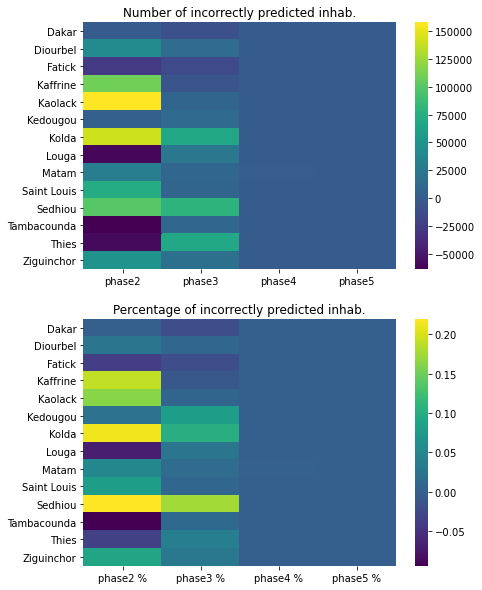

In [47]:
fig, ax = plt.subplots(2,1, figsize=(7,10))


sns.heatmap(data = diff_df[[f'phase{i}' for i in range(2,6)]], ax=ax[0], 
            cmap='viridis')
ax[0].set_title("Number of incorrectly predicted inhab.")

sns.heatmap(data = diff_df[[f'phase{i} %' for i in range(2,6)]], ax=ax[1],
           cmap='viridis')
ax[1].set_title("Percentage of incorrectly predicted inhab.")
sns.color_palette("cubehelix", as_cmap=True)


Sedhiou shows the biggest difference

Text(0, 0.5, 'Number of Inhab.')

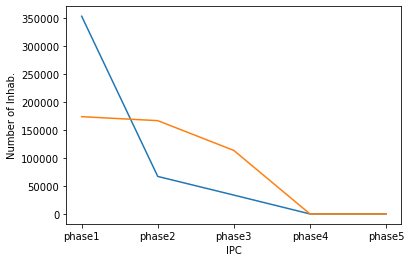

In [48]:
fig, ax = plt.subplots(1,1)
ax.plot(ground_df.xs("Sedhiou"))
ax.plot(pred_df.xs("Sedhiou"))
ax.set_xlabel('IPC')
ax.set_ylabel('Number of Inhab.')

In [49]:
df

,adm0_name,adm0_gaulcode,adm0_pcod3,adm0_pcod2,region,adm1_name,adm1_gaulcode,adm1_pcod3,adm1_pcod2,adm2_name,...,exercise_label,exercise_year,reference_code,reference_label,reference_year,status,notes,Comments,DataSource,UseThisPeriod
0,Burkina Faso,42,BFA,BF,NaN,Boucle du Mouhoun,40276.0,BFA046,BF46,Bale,...,Jun-Aug,2020,3,Jun-Aug,2020,outofcamp,NaN,NaN,NaN,NaN
1,Burkina Faso,42,BFA,BF,NaN,Centre-Nord,40280.0,BFA049,BF49,Bam,...,Jun-Aug,2020,3,Jun-Aug,2020,outofcamp,NaN,NaN,NaN,NaN
2,Burkina Faso,42,BFA,BF,NaN,Boucle du Mouhoun,40276.0,BFA046,BF46,Banwa,...,Jun-Aug,2020,3,Jun-Aug,2020,outofcamp,NaN,NaN,NaN,NaN
3,Burkina Faso,42,BFA,BF,NaN,Centre-Sud,40282.0,BFA051,BF51,Bazega,...,Jun-Aug,2020,3,Jun-Aug,2020,outofcamp,NaN,NaN,NaN,NaN
4,Burkina Faso,42,BFA,BF,NaN,Sud-Ouest,40288.0,BFA057,BF57,Bougouriba,...,Jun-Aug,2020,3,Jun-Aug,2020,outofcamp,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16186,Central African Republic,49,CAF,CF,NaN,NaN,NaN,NaN,NaN,NaN,...,Jan-May,2018,2,Jan-May,2018,outofcamp,NaN,NaN,IPC_CAR_AFI_Situation_2018March_French,Y
16187,Central African Republic,49,CAF,CF,NaN,NaN,NaN,NaN,NaN,NaN,...,Jan-May,2018,3,Jun-Aug,2018,outofcamp,NaN,NaN,IPC_CAR_AFI_Situation_2018March_French,Y
16188,Central African Republic,49,CAF,CF,NaN,NaN,NaN,NaN,NaN,NaN,...,Sep-Dec,2018,1,Sep-Dec,2018,outofcamp,NaN,NaN,IPC_CAR_AFI_Analysis_Report_Sept2018_Final,Y
16189,Central African Republic,49,CAF,CF,NaN,NaN,NaN,NaN,NaN,NaN,...,Sep-Dec,2018,2,Jan-May,2019,outofcamp,NaN,NaN,IPC_CAR_AFI_Analysis_Report_Sept2018_Final,Y


In [50]:
ground_df.head(1)


,phase1,phase2,phase3,phase4,phase5
Dakar,431811.0,49069.0,9814.0,0.0,0.0


In [51]:
pred_df.head(1)

,phase1,phase2,phase3,phase4,phase5
Dakar,441625.0,49069.0,0.0,0.0,0.0
